In [ ]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import pad_sequences
import random

In [ ]:
def gen_len50(size=100000):
    X_data_1 = []
    Y_data_1 = []
    for i in range(size):
        length = random.randint(1, 50)
        data = np.random.randint(2, size=(1, length)).astype("float32")
        data = pad_sequences(data, maxlen=50, dtype='float32', padding='pre')
        X_data_1.append(data)
        labels = [0 if np.sum(X_data_1[i])%2 == 0 else 1]
        Y_data_1.append(labels)
    return X_data_1, Y_data_1

In [ ]:
X_data1, Y_data1 = gen_len50()

In [ ]:
X_data1[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        1., 0.]], dtype=float32)

In [ ]:
X_data1[2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        1., 0.]], dtype=float32)

In [ ]:
X_data1[3]

array([[0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 1.]], dtype=float32)

In [ ]:
Y_data1[0]

[0]

In [ ]:
Y_data1[2]

[0]

In [ ]:
split_size = int(100000*0.20)

In [ ]:
split_size

20000

In [ ]:
X_train = X_data1[split_size:]
X_test = X_data1[:split_size]

Y_train = Y_data1[split_size:]
Y_test = Y_data1[:split_size]

In [ ]:
print(len(X_train))

80000


In [ ]:
model = Sequential([
    LSTM(32, return_sequences=True, activation='sigmoid', input_shape=(1, 50)),
    LSTM(64, return_sequences=True, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             10624     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             24832     
                                                                 
 dense (Dense)               (None, 1, 1)              65        
                                                                 
Total params: 35,521
Trainable params: 35,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [ ]:
norm = np.linalg.norm(X_train)
normal_array = X_train/norm
print(normal_array)

[[[0.         0.         0.         ... 0.00099023 0.00099023 0.00099023]]

 [[0.         0.         0.         ... 0.         0.         0.00099023]]

 [[0.         0.         0.         ... 0.00099023 0.         0.00099023]]

 ...

 [[0.         0.         0.         ... 0.00099023 0.00099023 0.        ]]

 [[0.         0.         0.         ... 0.00099023 0.         0.        ]]

 [[0.         0.         0.         ... 0.00099023 0.         0.        ]]]


In [ ]:
norm = np.linalg.norm(Y_train)
normal_array = Y_train/norm
print(normal_array)

[[0.0049909]
 [0.0049909]
 [0.0049909]
 ...
 [0.       ]
 [0.0049909]
 [0.0049909]]


In [ ]:
norm = np.linalg.norm(X_test)
normal_array = X_test/norm
print(normal_array)

[[[0.        0.        0.        ... 0.        0.0019804 0.       ]]

 [[0.        0.        0.        ... 0.        0.        0.       ]]

 [[0.        0.        0.        ... 0.        0.0019804 0.       ]]

 ...

 [[0.        0.        0.        ... 0.        0.        0.0019804]]

 [[0.        0.        0.0019804 ... 0.        0.        0.       ]]

 [[0.        0.        0.        ... 0.0019804 0.0019804 0.       ]]]


In [ ]:
norm = np.linalg.norm(Y_test)
normal_array = Y_test/norm
print(normal_array)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.00996617]
 [0.00996617]
 [0.00996617]]


In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
2500/2500 [==============================] - 10s 3ms/step - loss: 0.6937 - acc: 0.5027
Epoch 2/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - acc: 0.5080
Epoch 3/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6921 - acc: 0.5149
Epoch 4/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6906 - acc: 0.5142
Epoch 5/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6880 - acc: 0.5127
Epoch 6/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6845 - acc: 0.5155
Epoch 7/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6802 - acc: 0.5198
Epoch 8/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6761 - acc: 0.5193
Epoch 9/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6723 - acc: 0.5228
Epoch 10/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6686 - acc: 0.5269
Epoch 11/50
2500/2500 [=====

In [ ]:
# Evaluate model on test set
preds = model.predict(X_test)
preds = np.round(preds[:, 0]).astype('float32')
acc = (np.sum(preds == Y_test) / len(Y_test)) * 100.
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 56.52%


In [ ]:
def plot_model(history):
    ''' Plot model accuracy and loss
    Args:
        history: Keras dictionary contatining training/validation loss/acc
    Returns:
        Plots model's training/validation loss and accuracy history
    '''
    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    acc = history.history['acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    return

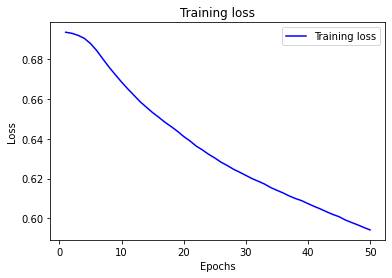

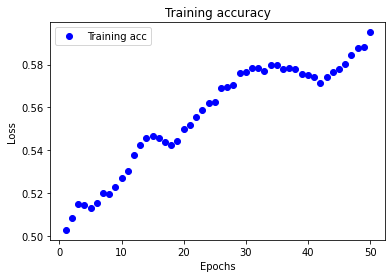

In [ ]:
plot_model(history)